
# Homework 2


Spencer Pease  
ASTR 427

--------------------------

In [1]:
# Imports

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

## Problem 1

In [2]:
# Euler method

def euler(deriv, state, step):
    """
    euler is a function that does one step of numerical integration given a state of values and a function
    to find how those values change with time. It returns a new set of values one step ahead of the given values.
    - deriv: function that evaluates the derivative of the given state
    - state: list of values to perfom euler integration on
    - step: interval over which to update the given state
    - return: updated state
    """
    state = np.array(state)
    
    return state + (step * deriv(state))

In [3]:
# Runge-Kutta

def runge_kutta(deriv, state, step):
    """
    runge_kutta is a function that does one step of numerical integration given a state of values and a function
    to find how those values change with time. It returns a new set of values one step ahead of the given values.
    - deriv: function that evaluates the derivative of the given state
    - state: list of values to perfom Runge-Kutta integration on
    - step: interval over which to update the given state
    - return: updated state
    """
    state = np.array(state)
    
    k1 = step * deriv(state)
    k2 = step * deriv(state + k1/2)
    k3 = step * deriv(state + k2/2)
    k4 = step * deriv(state + k3)
    
    return state + (k1/6 + k2/3 + k3/3 + k4/6)

In [4]:
# Leapfrog

def leapfrog(deriv, state, step):
    """
    leapfrog is a function that does one step of numerical integration given a state of values, a function
    to find the derivatives of the values, and step size. It return a new set of values one step ahead of
    the given values.
    - deriv: function that evaluates the derivative of the given state
    - state: list of values to perfom Runge-Kutta integration on
    - step: interval over which to update the given state
    - return: updated state
    """
    state = np.array(state)
    
    new_state[1] = state[1] + step * deriv(state)[1]
    new_state[0] = state[0] + step * deriv(new_state)[0]
    
    
    return new_state

## Problem 2

Equation to solve:
    
$\frac{d^{2}x}{dt^{2}} + x = 0$

Initial conditions:  
`x(0) = 1`  
`x'(0) = 0`

In [5]:
def deriv(y):
    """
    function that, given a list of differential equations, returns a list containing the derivative of each equation
    NOTE: this function only works for the differential equation defined above
    - y: list of differential equations
    - return: derivative of each equation in y
    """
    dydx = np.array([y[1], -y[0]])
    return dydx

# List of initial conditions (given in same order as they correspond to x)
# t; dx/dt
# x(0) = 1; x'(0) = 0
initial_state = [1, 0]

# stepsize
step = .03

# integration range
t = [0, 30]

In [6]:
# 2a (euler)

# reset state to initial state
state = initial_state

# point to evaluate the state at
index = t[0]

# find the numerical integration value over the integration range `t` via Euler's method
while index <= t[1]:
    
    new_state = euler(deriv, state, step)
    state = new_state
    index += step

print "Numerical result via Euler's method with a", step, "step size:", state[0]

Numerical result via Euler's method with a 0.03 step size: 0.227920346306


This method is not very accurate above a .01 step size

In [7]:
# 2a (runge-kutta)

# reset state to initial state
state = initial_state

# point to evaluate the state at
index = t[0]

# find the numerical integration value over the integration range `t` via Runge-Kutta
while index <= t[1]:
    
    new_state = runge_kutta(deriv, state, step)
    state = new_state
    index += step

print "Numerical result via Runge-kutta with a", step, "step size:", state[0]

Numerical result via Runge-kutta with a 0.03 step size: 0.154251249095


This method is not very accurate above a .3 step size

In [8]:
# 2a (leapfrog)

# reset state to initial state
state = np.array(initial_state)

# point to evaluate the state at
index = t[0]

# initial v_1/2 value
v = state[1] + step/2 * deriv(state)[1]

# udate initial state with v_1/2
state[1] = v

while index <= t[1]:
    
    new_state = leapfrog(deriv, state, step)
    
    state = new_state
    index += step

print "Numerical result via Leapfrog with a", step, "step size:", state[0]

Numerical result via Leapfrog with a 0.03 step size: 0.170182529172


This method is not very accurate above a .03 step size

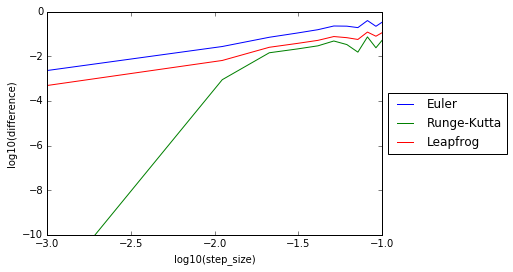

In [9]:
#2b

def test_step(method, deriv, initial_state, interval, step):
    """
    test_step is a function created to perform numerical integration for various step sizes.
    - method: numerical integration function that takes in parameters of deriv, state, and step
    - deriv: function that evaluates the derivative of the given state
    - initial_state: list of numbers defining the state at which to start evaluation
    - interval: list containing the beginning and end points of the interval over which to do integration
    - step: rate at which integration is perfomed over the interval
    - retrun: numerical integration value defined by the above parameters
    """
    index = interval[0]
    state = initial_state

    while index <= interval[1]:
        new_state = method(deriv, state, step)
        state = new_state
        index += step

    return state

# range of step values to test
h = np.linspace(.001, 1, 100)

# lists of integration results for varying step values with different integration methods
e_result = np.array([]) # euler
rk_result = np.array([]) # runge-kutta
lf_result = np.array([]) # leapfrog

for j in h:
    e_result = np.append(e_result, test_step(euler, deriv, initial_state, t, j)[0])
    rk_result = np.append(rk_result, test_step(runge_kutta, deriv, initial_state, t, j)[0])
    lf_result = np.append(lf_result, test_step(leapfrog, deriv, initial_state, t, j)[0])

# difference between numerical integration and the analytical result for varying step values and methods of integration
e_result = e_result - np.cos(30)
rk_result = rk_result - np.cos(30)
lf_result = lf_result - np.cos(30)

# plotting
plt.xlim(-3, -1)
plt.ylim(-10, 0)
plt.plot(np.log10(h), np.log10(np.absolute(e_result)), label='Euler')
plt.plot(np.log10(h), np.log10(np.absolute(rk_result)), label='Runge-Kutta')
plt.plot(np.log10(h), np.log10(np.absolute(lf_result)), label='Leapfrog')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('log10(step_size)')
plt.ylabel('log10(difference)')
plt.show()

## Problem 3

$\Phi = \frac{-1}{\sqrt{1 + x^{2} + y^{2}}}$  

$\frac{d^{2}x}{dt^{2}} = \frac{-x}{(1 + x^{2} + y^{2})^{3/2}}$

$\frac{d^{2}y}{dt^{2}} = \frac{-y}{(1 + x^{2} + y^{2})^{3/2}}$

In [10]:
def deriv2(y):
    """
    function that, given a list of differential equations, returns a list containing the derivative of each equation
    NOTE: this function only works for the differential equation defined in problem 3
    - y: list of differential equations
    - return: derivative of each equation in y
    """
    
    result = [y[2], y[3], -y[0]/(1 + y[0]**2 + y[1]**2)**(3/2), -y[1]/(1 + y[0]**2 + y[1]**2)**(3/2)]
    return np.array(result)

# set up conditions for problem 3
initial_state2 = [1, 0, 0, .3]
t2 = [0, 100]
step2 = .01

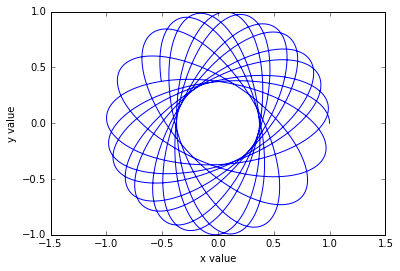

In [11]:
#3a

# reset state to initial state
state = initial_state2

# point to evaluate the state at
index = t2[0]

# lists to store results in
x_result = []
y_result = []

# find the numerical integration value over the integration range `t2` via Runge-Kutta
while index <= t2[1]:
    
    # update results
    x_result.append(state[0])
    y_result.append(state[1])
    
    # update state
    new_state = runge_kutta(deriv2, state, step2)
    state = new_state
    index += step2

# plotting
plt.xlim(-1.5, 1.5)
plt.ylim(-1, 1)
plt.plot(x_result, y_result, label='Result')

plt.xlabel('x value')
plt.ylabel('y value')
plt.show()

$E = \frac{(x\prime^{2} + y\prime^{2})}{2} + \Phi(x, y)$

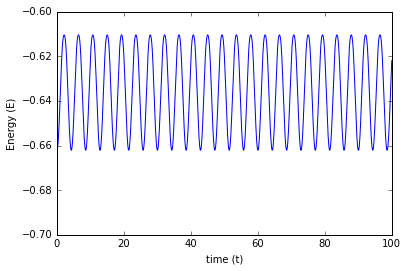

In [12]:
#3b

# reset state to initial state
state = initial_state2

# point to evaluate the state at
index = t2[0]

# lists to store results in
x = np.array([])
y = np.array([])
xp = np.array([]) # x'
yp = np.array([]) # y'

while index <= t2[1]:
    
    # update results
    x = np.append(x, [state[0]])
    y = np.append(y, [state[1]])
    xp = np.append(xp, [state[2]])
    yp = np.append(yp, [state[3]])
    
    # update state
    new_state = runge_kutta(deriv2, state, step2)
    state = new_state
    index += step2

def phi(x, y):
    """
    phi is a function defined in problem 3 above, dependent on x and y
    """
    phi = -1 / np.sqrt(1 + x**2 + y**2)
    return phi

# time to plot function over
t = np.linspace(t2[0], t2[1], (t2[1]-t2[0])/step2)

# plotting
plt.xlim(0, 100)
plt.ylim(-.7, -.6)
plt.plot(t, .5*(xp**2 + yp**2) + phi(x, y))

plt.xlabel('time (t)')
plt.ylabel('Energy (E)')
plt.show()